In [48]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt
def nash_equilibrium(A):
    # Поиск минимума матрицы А
    min_value = abs(np.amin(A)) + 1
    # Делаем матрицу положительной
    A += min_value
    # Подготовка столбцов ограничений для ЗЛП
    z = np.ones(A.shape[0])
    b_1 = -np.ones(A.shape[1])
    w = -np.ones(A.shape[1])
    b_2 = np.ones(A.shape[0])
    # Поиск оптимального решения в смешанных стратегиях
    # Игрок 1
    res = linprog(w, A, b_2) 
    q = res.get("x")
    # Игрок 2
    A = -np.transpose(A)
    res = linprog(z, A, b_1)
    p = res.get("x")
    if (len([item for item in p if item != 0]) == 1) and (len([item for item in q if item != 0]) == 1):
        print("Единственная точка равновесия по Нэшу.")
    #Расчет значения игры
    v = 1 / np.sum(p)
    p *= v
    q *= v
    v = v - min_value
    print("p: ", p)
    print("q: ", q)
    print("v: ", v)
    return p, q, v



## Функция, визуализирующая спектры оптимальных стратегий

In [ ]:
def draw(p, q):
    x = max(len(p), len(q))
    y = max(max(p), max(q))
    plt.xlim([0, x + x / 2])
    plt.ylim([0, y + y / 2])
    for i, value in enumerate(p):
        plt.scatter(1.0 * i + 1, value, color = 'green')
        plt.plot([1.0 * i + 1, 1.0 * i + 1], [0.0, value], color = 'green') 
        plt.grid(True)   # линии вспомогательной сетки
    plt.show()
    plt.xlim([0, x + x / 2])
    plt.ylim([0, y + y / 2])
    for i, value in enumerate(q):
        plt.scatter(1.0 * i + 1, value, color = 'red')
        plt.plot([1.0 * i + 1, 1.0 * i + 1], [0.0, value], color = 'red')
        plt.grid(True)   # линии вспомогательной сетки
    plt.show()

## Примеры игры

- спектр оптимальной стратегии состоит из одной точки
- спектр оптимальной стратегии неполон
- спектр оптимальной стратегии полон

## 1. Спектр оптимальной стратегии состоит из одной точки


Введите число строк в матрице выигрышей А:
3
Введите матрицу выигрышей А по строкам:
7 9 4
6 8 5
10 -3 2
Единственная точка равновесия по Нэшу.
p:  [0. 1. 0.]
q:  [0. 0. 1.]
v:  4.9999999999999964


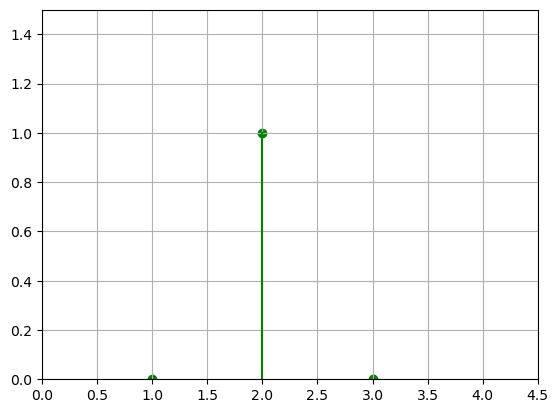

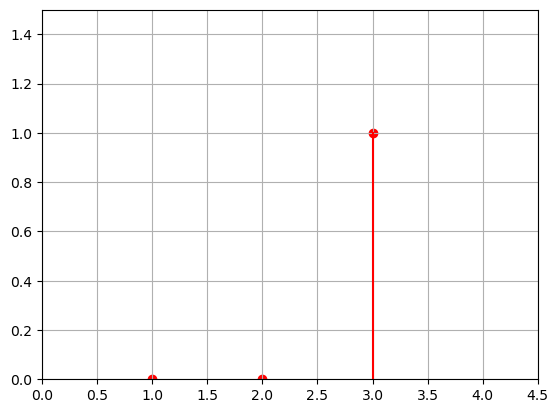

In [53]:
print("Введите число строк в матрице выигрышей А:")
n = int(input())
A = []
print("Введите матрицу выигрышей А по строкам:")
for i in range(n):
    row = input().split()
    for i in range(len(row)):
        row[i] = float(row[i])
    A.append(row)
A = np.array(A)
p,q,v = nash_equilibrium(A)
draw(p, q)

## 2. Спектр оптимальной стратегии неполон

Введите число строк в матрице выигрышей А:
3
Введите матрицу выигрышей А по строкам:
1 0 3
2 5 8
7 3 3
p:  [0.         0.57142857 0.42857143]
q:  [0.28571429 0.71428571 0.        ]
v:  4.142857142857142


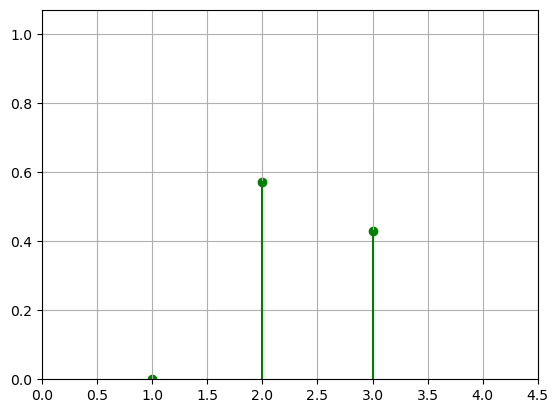

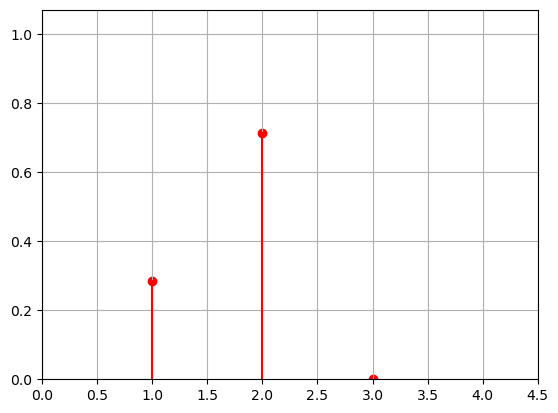

In [51]:
print("Введите число строк в матрице выигрышей А:")
n = int(input())
A = []
print("Введите матрицу выигрышей А по строкам:")
for i in range(n):
    row = input().split()
    for i in range(len(row)):
        row[i] = float(row[i])
    A.append(row)
A = np.array(A)
p,q,v = nash_equilibrium(A)
draw(p, q)

### 3. Спектр оптимальной стратегии полон

Введите число строк в матрице А:
3
Введите матрицу А по строкам
2 0 1
1 2 0
0 1 2
p:  [0.33333333 0.33333333 0.33333333]
q:  [0.33333333 0.33333333 0.33333333]
v:  1.0


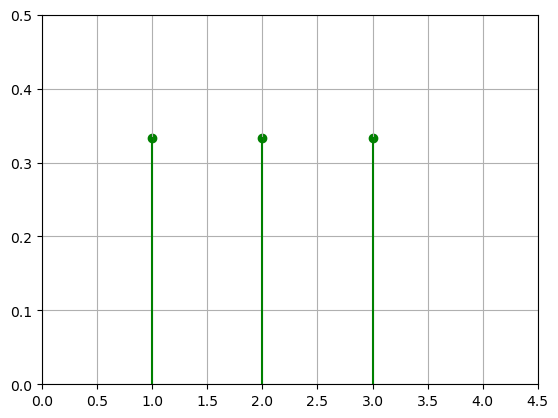

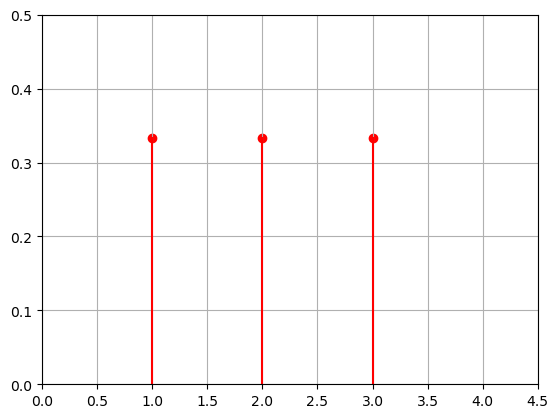

In [52]:
print("Введите число строк в матрице А:")
n = int(input())
A = []
print("Введите матрицу А по строкам")
for i in range(n):
    row = input().split()
    for i in range(len(row)):
        row[i] = float(row[i])
    A.append(row)
A = np.array(A)
p,q,v = nash_equilibrium(A)
draw(p, q)